In [30]:
import numpy as np
import xarray as xr
from siphon.catalog import TDSCatalog
import matplotlib.pyplot as plt

In [31]:
base_url = 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/'
cat = TDSCatalog('http://smode.whoi.edu:8080/thredds/catalog/insitu/navo_glider/catalog.html')

In [32]:
# print("\n".join(cat.datasets.keys()))

In [33]:
# Get single data file
glider_data = xr.open_dataset(base_url+'ng780_2021_0906_1120_0123737W_037354N_21242000057.nc')

In [82]:
glider_data

<xarray.Dataset>
Dimensions:           (temp_flag_num: 2, salt_flag_num: 2, time: 1597, prof_num: 2)
Dimensions without coordinates: temp_flag_num, salt_flag_num, time, prof_num
Data variables: (12/15)
    temp_flag_index   (temp_flag_num) int32 149 995
    temp_flag         (temp_flag_num) int32 4 4
    salt_flag_index   (salt_flag_num) int32 149 995
    salt_flag         (salt_flag_num) int32 4 4
    latitude          (time) float32 37.36 37.36 37.36 ... 37.36 37.36 37.36
    longitude         (time) float32 -123.7 -123.7 -123.7 ... -123.7 -123.7
    ...                ...
    conductivity      (time) float32 41.69 41.7 41.7 41.71 ... 32.4 32.4 32.4
    cond_orig         (time) float32 41.69 41.7 41.7 41.71 ... 32.4 32.4 32.4
    salinity          (time) float32 33.54 33.55 33.55 ... 34.44 34.44 34.44
    depth             (time) float32 8.677 9.054 9.352 ... 959.2 959.5 959.8
    prof_start_index  (prof_num) int32 0 832
    prof_end_index    (prof_num) int32 831 1596
Attributes: (12/14)
    Conventions:                       CF-1.0
    instrumentid:                      NG780
    institution:                       Naval Oceanographic Offic
    history:                           Written Sep 06, 2021 12:03
    dive_number:                       21242000057
    file_version:                      2.0
    ...                                ...
    Glidertype:                        Slocum_Glider
    tbdfound:                          1
    Classification:                    PUBLIC RELEASE
    Classification_Key:                100
    Classification_Statement:          *** UNCLASSIFIED PUBLIC DOMAIN *** DIS...
    Received_yyyy_mm_dd_hh_mm_ss_gmt:  2021 09 06 11 20 58

In [80]:
glider_data.sel(temp_flag_num=0,salt_flag_num=0,prof_num=0)

<xarray.Dataset>
Dimensions:           (time: 1597)
Dimensions without coordinates: time
Data variables: (12/15)
    temp_flag_index   int32 149
    temp_flag         int32 4
    salt_flag_index   int32 149
    salt_flag         int32 4
    latitude          (time) float32 37.36 37.36 37.36 ... 37.36 37.36 37.36
    longitude         (time) float32 -123.7 -123.7 -123.7 ... -123.7 -123.7
    ...                ...
    conductivity      (time) float32 41.69 41.7 41.7 41.71 ... 32.4 32.4 32.4
    cond_orig         (time) float32 41.69 41.7 41.7 41.71 ... 32.4 32.4 32.4
    salinity          (time) float32 33.54 33.55 33.55 ... 34.44 34.44 34.44
    depth             (time) float32 8.677 9.054 9.352 ... 959.2 959.5 959.8
    prof_start_index  int32 0
    prof_end_index    int32 831
Attributes: (12/14)
    Conventions:                       CF-1.0
    instrumentid:                      NG780
    institution:                       Naval Oceanographic Offic
    history:                           Written Sep 06, 2021 12:03
    dive_number:                       21242000057
    file_version:                      2.0
    ...                                ...
    Glidertype:                        Slocum_Glider
    tbdfound:                          1
    Classification:                    PUBLIC RELEASE
    Classification_Key:                100
    Classification_Statement:          *** UNCLASSIFIED PUBLIC DOMAIN *** DIS...
    Received_yyyy_mm_dd_hh_mm_ss_gmt:  2021 09 06 11 20 58

[(1000.0, 0.0), (1000.0, 0.0)]

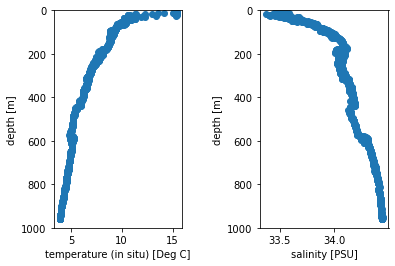

In [125]:
fig, axs = plt.subplots(1,2)

glider_data.plot.scatter(x='temp',y='depth',ax=axs[0])

plt.subplots_adjust(wspace=.6)

glider_data.plot.scatter(x='salinity',y='depth',ax=axs[1])

[ax.set_ylim(1000,0) for ax in axs]

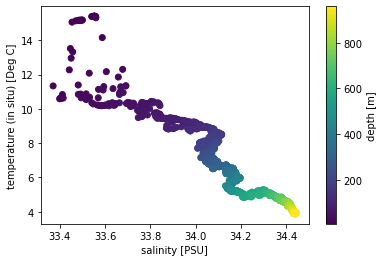

In [124]:
im = glider_data.plot.scatter(x='salinity',
                              y='temp',
                              c=glider_data.depth,
)
plt.colorbar(im,label='depth [m]')

In [89]:
# This doesn't make sense!
glider_data.isel(prof_num=0).temp-glider_data.isel(prof_num=1).temp

<xarray.DataArray 'temp' (time: 1597)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Dimensions without coordinates: time

In [91]:
# Neither does this!
glider_data.isel(temp_flag_num=0).temp-glider_data.isel(temp_flag_num=1).temp

<xarray.DataArray 'temp' (time: 1597)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Dimensions without coordinates: time

In [126]:
# Get all data from single glider
filelist=[file for file in 
            cat.datasets if file.startswith('ng780')]

datapath = [base_url+f for f in filelist]

In [127]:
datapath

['http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng780_2021_1005_1710_0123337W_037281N_21242000205.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng780_2021_1005_0541_0123234W_037259N_21242000198.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng780_2021_1004_1832_0123118W_037226N_21242000196.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng780_2021_1004_0717_0123206W_037142N_21242000194.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng780_2021_1003_2001_0123329W_037088N_21242000192.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng780_2021_1003_0849_0123311W_037015N_21242000190.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng780_2021_1002_2128_0123237W_036986N_21242000187.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng780_2021_1002_1022_0123150W_036989N_21242000183.nc',
 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/ng

In [123]:
# This won't work because the titles have a meaningless timestamp
# try to merge using scitime, which is datetime[ns]
# filename = 'ng780_2021_0913_2119_0123094W_037128N_21242000094.nc'
# ng780 = xr.open_mfdataset(datapath,combine='by_coords',parallel=True)

In [128]:
# Let's try something simpler first: loop over the files
# and get their average coordinates (longitude, latitude)
# and time.